In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import math
results_path = "/hpc/home/mk423/Anxiety/FullDataWork/Validations/"

plots_path = "/hpc/home/mk423/Anxiety/FullDataWork/Figures/"


def mean_sterr_auc_3n(auc_dict):
    temp = []
    temp_2 = []
    temp_3 = []
    n_samps = 0
    for i, key in enumerate(auc_dict.keys()):
        if ~np.isnan(auc_dict[key][0]):            
            temp.append(auc_dict[key][0])
            temp_2.append(auc_dict[key][1])
            temp_3.append(auc_dict[key][2])
            
    mean = np.mean(temp)
    stderr = np.std(temp) / np.sqrt(len(temp))
    
    mean_2 = np.mean(temp_2)
    stderr_2 = np.std(temp_2) / np.sqrt(len(temp_2))
    
    mean_3 = np.mean(temp_3)
    stderr_3 = np.std(temp_3) / np.sqrt(len(temp_3))
    
    return mean, stderr, mean_2, stderr_2, mean_3, stderr_3, len(temp)

def mean_sterr_auc(auc_dict):
    temp = []
    n_samps = 0
    for i, key in enumerate(auc_dict.keys()):
        if ~np.isnan(auc_dict[key][0]):            
            temp.append(auc_dict[key])
    mean = np.mean(temp)
    stderr = np.std(temp) / np.sqrt(len(temp))
    return mean, stderr, len(temp)

## 3 Network Performance

Here we consider the performance of 3 separate networks each trained to predict for the same task. Each of the 3 networks are initialized with a different network from the unsupervised NMF model that has been adjusted to rebalance the training data. Once again we find similar predictive performance to when we trained on all of the data for pretraining, but we've lost network consistency that we were seeing earlier.

In [19]:
results_file = results_path + "unbal_3_net_{}_results.pkl"
plots_file = plots_path + "unbal_3_network_net_{}_30_component_kf_fold_{}_electome.png"

fold_list = [1,2,3,4]
flx_auc_list = []
epm_auc_list = []
oft_auc_list = []

flx_sterr_list = []
epm_sterr_list = []
oft_sterr_list = []

flx_points_list = []
epm_points_list = []
oft_points_list = []

flx_auc_list_2 = []
epm_auc_list_2 = []
oft_auc_list_2 = []

flx_sterr_list_2 = []
epm_sterr_list_2 = []
oft_sterr_list_2 = []

flx_points_list_2 = []
epm_points_list_2 = []
oft_points_list_2 = []

flx_auc_list_3 = []
epm_auc_list_3 = []
oft_auc_list_3 = []

flx_sterr_list_3 = []
epm_sterr_list_3 = []
oft_sterr_list_3 = []

flx_points_list_3 = []
epm_points_list_3 = []
oft_points_list_3 = []

net_1_list = []
net_2_list = []
net_3_list = []
for fold in fold_list:
    
    resultsDict = pickle.load(open(results_file.format(fold),"rb"))
    print(fold)
    
    flx_mean, flx_sterr, flx_mean_2, flx_sterr_2, flx_mean_3, flx_sterr_3, flx_n = mean_sterr_auc_3n(resultsDict['flx_val_auc'])
    print("\nFLX_1",flx_mean, flx_sterr, flx_n)
    print("FLX_2",flx_mean_2, flx_sterr_2, flx_n)
    #print(resultsDict['flx_val_auc'].keys())
    #print(resultsDict['flx_train_auc'].keys())

    flx_auc_list.append(flx_mean)
    flx_sterr_list.append(flx_sterr)
    flx_points_list.append([resultsDict['flx_val_auc'][key][0] for key in resultsDict['flx_val_auc'].keys()])
    flx_auc_list_2.append(flx_mean_2)
    flx_sterr_list_2.append(flx_sterr_2)
    flx_points_list_2.append([resultsDict['flx_val_auc'][key][1] for key in resultsDict['flx_val_auc'].keys()])
    flx_auc_list_3.append(flx_mean_3)
    flx_sterr_list_3.append(flx_sterr_3)
    flx_points_list_3.append([resultsDict['flx_val_auc'][key][2] for key in resultsDict['flx_val_auc'].keys()])

    
    epm_mean, epm_sterr, epm_mean_2, epm_sterr_2, epm_mean_3, epm_sterr_3, epm_n = mean_sterr_auc_3n(resultsDict['epm_val_auc'])
    print("\nEPM_1",epm_mean, epm_sterr, epm_n)
    print("EPM_2",epm_mean_2, epm_sterr_2, epm_n)
    #print(resultsDict['epm_val_auc'].keys())
    #print(resultsDict['epm_train_auc'].keys())

    epm_auc_list.append(epm_mean)
    epm_sterr_list.append(epm_sterr)
    epm_points_list.append([resultsDict['epm_val_auc'][key][0] for key in resultsDict['epm_val_auc'].keys()])

    epm_auc_list_2.append(epm_mean_2)
    epm_sterr_list_2.append(epm_sterr_2)
    epm_points_list_2.append([resultsDict['epm_val_auc'][key][1] for key in resultsDict['epm_val_auc'].keys()])

    epm_auc_list_3.append(epm_mean_3)
    epm_sterr_list_3.append(epm_sterr_3)
    epm_points_list_3.append([resultsDict['epm_val_auc'][key][2] for key in resultsDict['epm_val_auc'].keys()])
    
    oft_mean, oft_sterr, oft_mean_2, oft_sterr_2, oft_mean_3, oft_sterr_3, oft_n = mean_sterr_auc_3n(resultsDict['oft_val_auc'])
    print("\nOFT_1",oft_mean, oft_sterr, oft_n)
    print("OFT_2",oft_mean_2, oft_sterr_2, oft_n)
    #print(resultsDict['oft_val_auc'].keys())
    #print(resultsDict['oft_train_auc'].keys())

    oft_auc_list.append(oft_mean)
    oft_sterr_list.append(oft_sterr)
    oft_points_list.append([resultsDict['oft_val_auc'][key][0] for key in resultsDict['oft_val_auc'].keys()])

    oft_auc_list_2.append(oft_mean_2)
    oft_sterr_list_2.append(oft_sterr_2)
    oft_points_list_2.append([resultsDict['oft_val_auc'][key][1] for key in resultsDict['oft_val_auc'].keys()])
    
    oft_auc_list_3.append(oft_mean_3)
    oft_sterr_list_3.append(oft_sterr_3)
    oft_points_list_3.append([resultsDict['oft_val_auc'][key][2] for key in resultsDict['oft_val_auc'].keys()])

    net_1_list.append(resultsDict['recon_cont_net_1'])
    net_2_list.append(resultsDict['recon_cont_net_2'])
    net_3_list.append(resultsDict['recon_cont_net_3'])
    print(resultsDict["best_epoch"])

1

FLX_1 0.6137712861665309 0.11642166025081037 3
FLX_2 0.6052930777825131 0.0613107961414055 3

EPM_1 0.5272835650704121 0.06521177677419755 7
EPM_2 0.4650880806063845 0.016621506795205677 7

OFT_1 0.6015644949507423 0.08250345966709062 3
OFT_2 0.6748952809311016 0.05517853163348186 3
1989
2

FLX_1 0.48310117345113607 0.21082435103252095 2
FLX_2 0.6191602096719517 0.03636818510827197 2

EPM_1 0.5225087694509318 0.02079494079875773 7
EPM_2 0.567891257589945 0.007193504312635537 7

OFT_1 0.6578290806765339 0.014405074889825835 2
OFT_2 0.5146232781148453 0.012178922205198868 2
1951
3

FLX_1 0.5921334154083571 0.010299326306515305 2
FLX_2 0.5014573402682191 0.005664982367599169 2

EPM_1 0.5399840975569067 0.01345371097973081 6
EPM_2 0.5409138318787604 0.013152205088354038 6

OFT_1 0.5534301036257836 0.02587600776468599 4
OFT_2 0.5409881052001306 0.009901889422202746 4
1963
4

FLX_1 0.5419682447506815 0.00091973709041537 2
FLX_2 0.5473679554161688 0.022490352245577005 2

EPM_1 0.5670019351

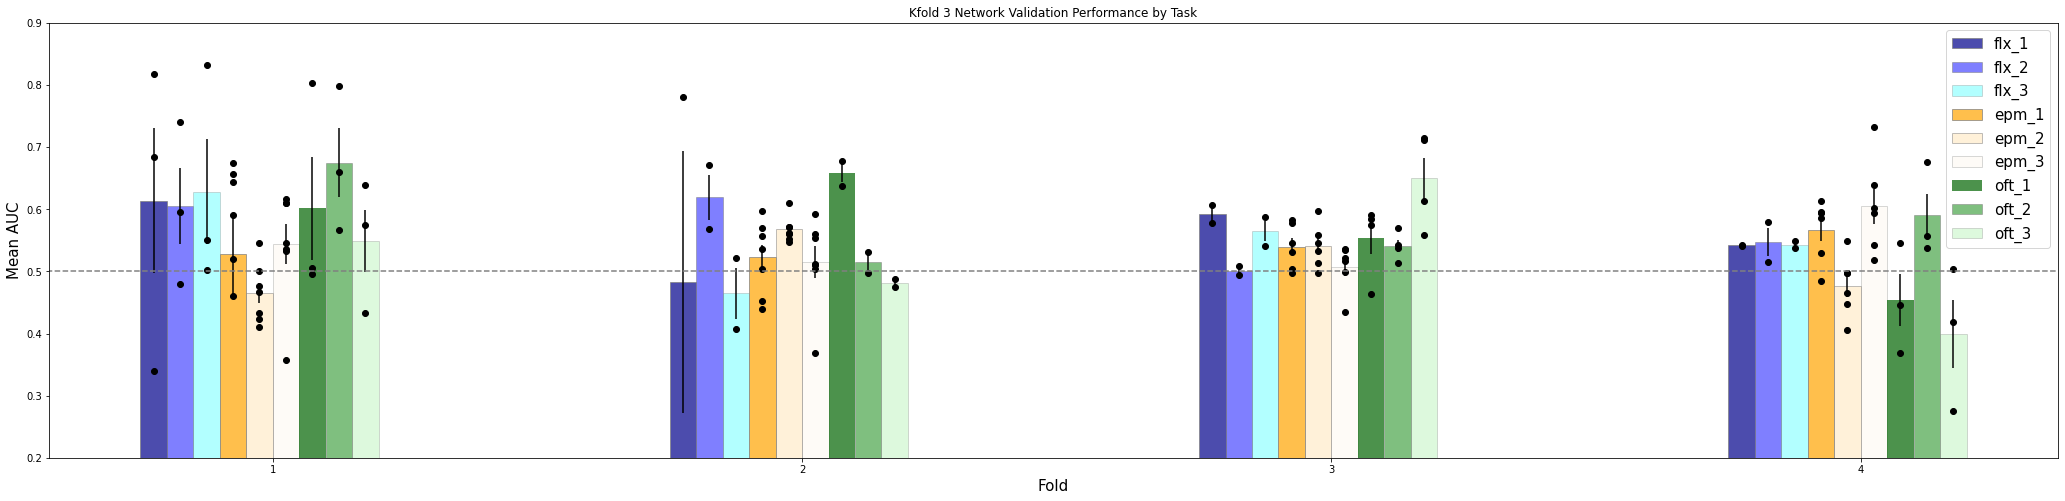

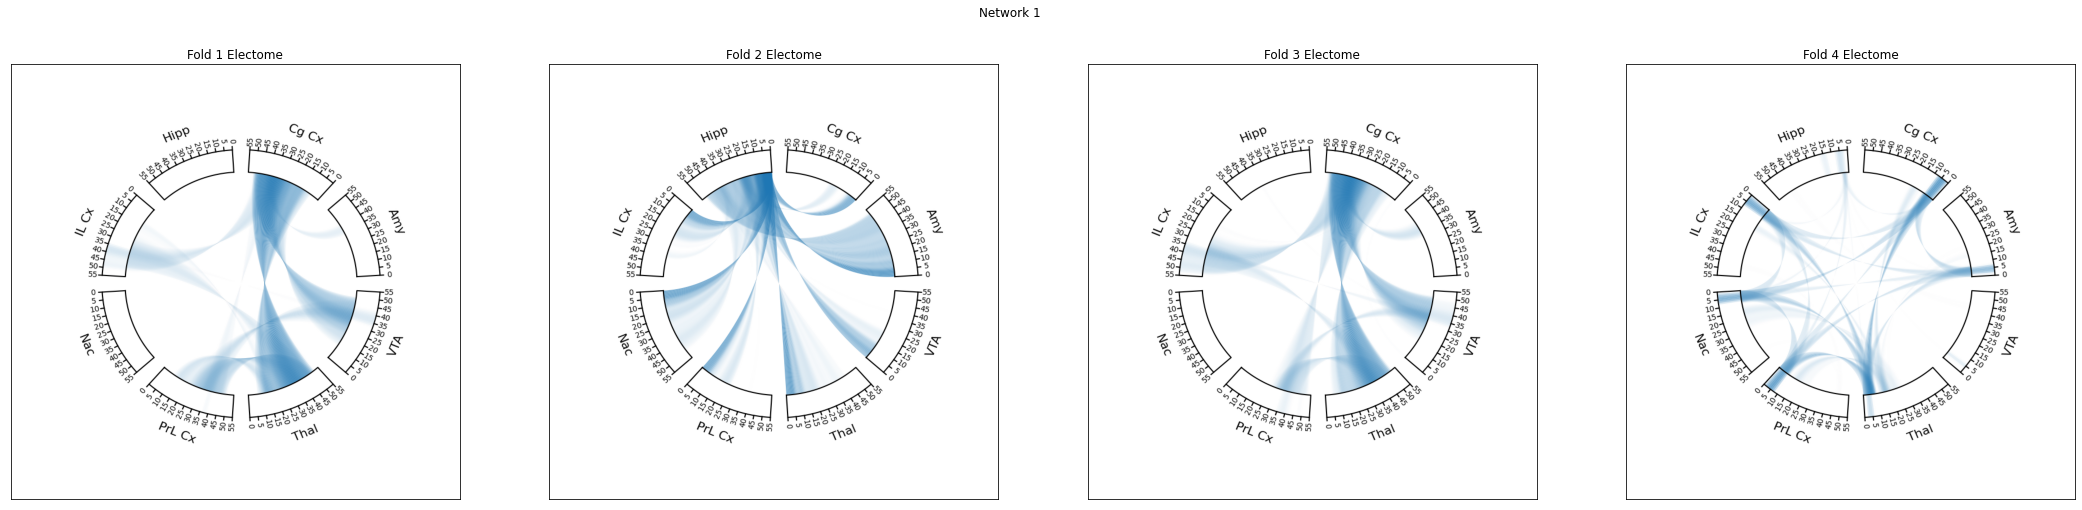

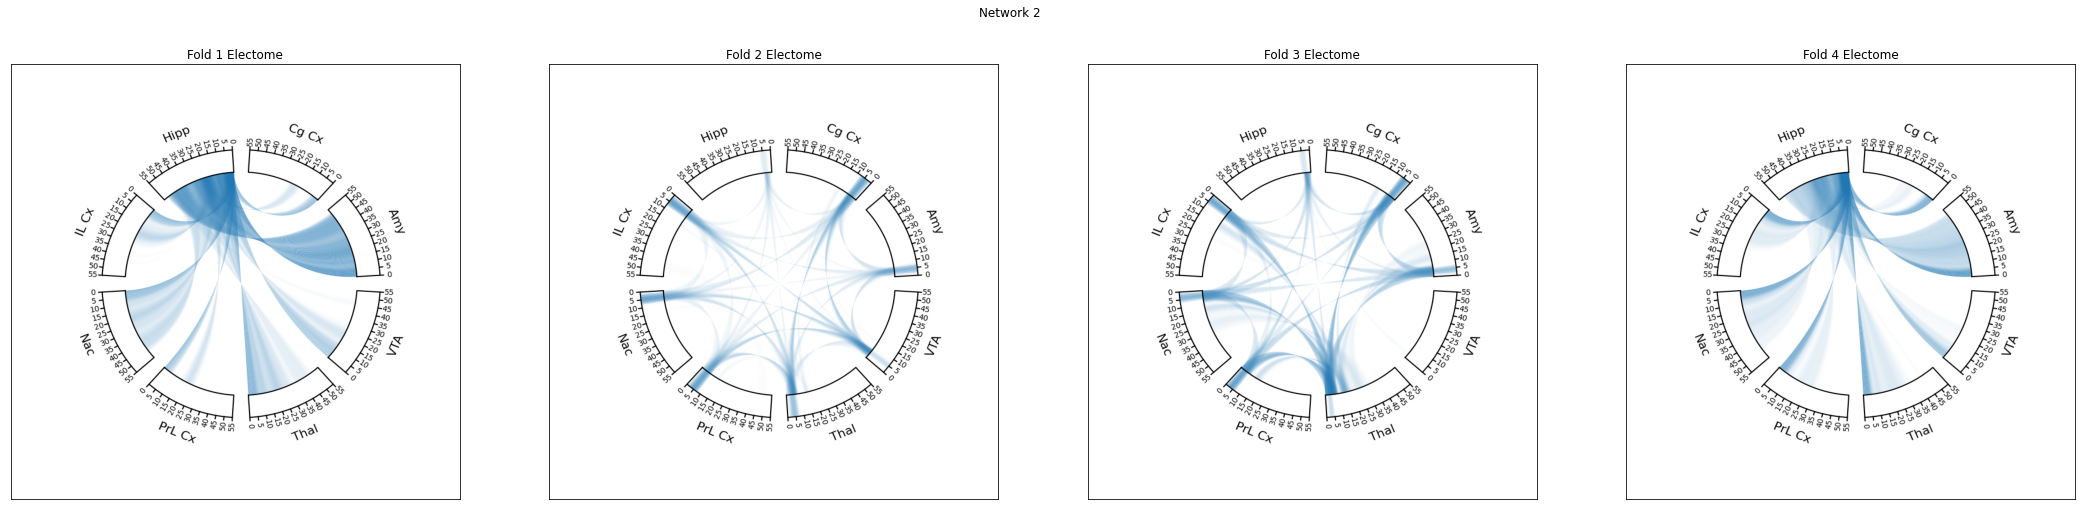

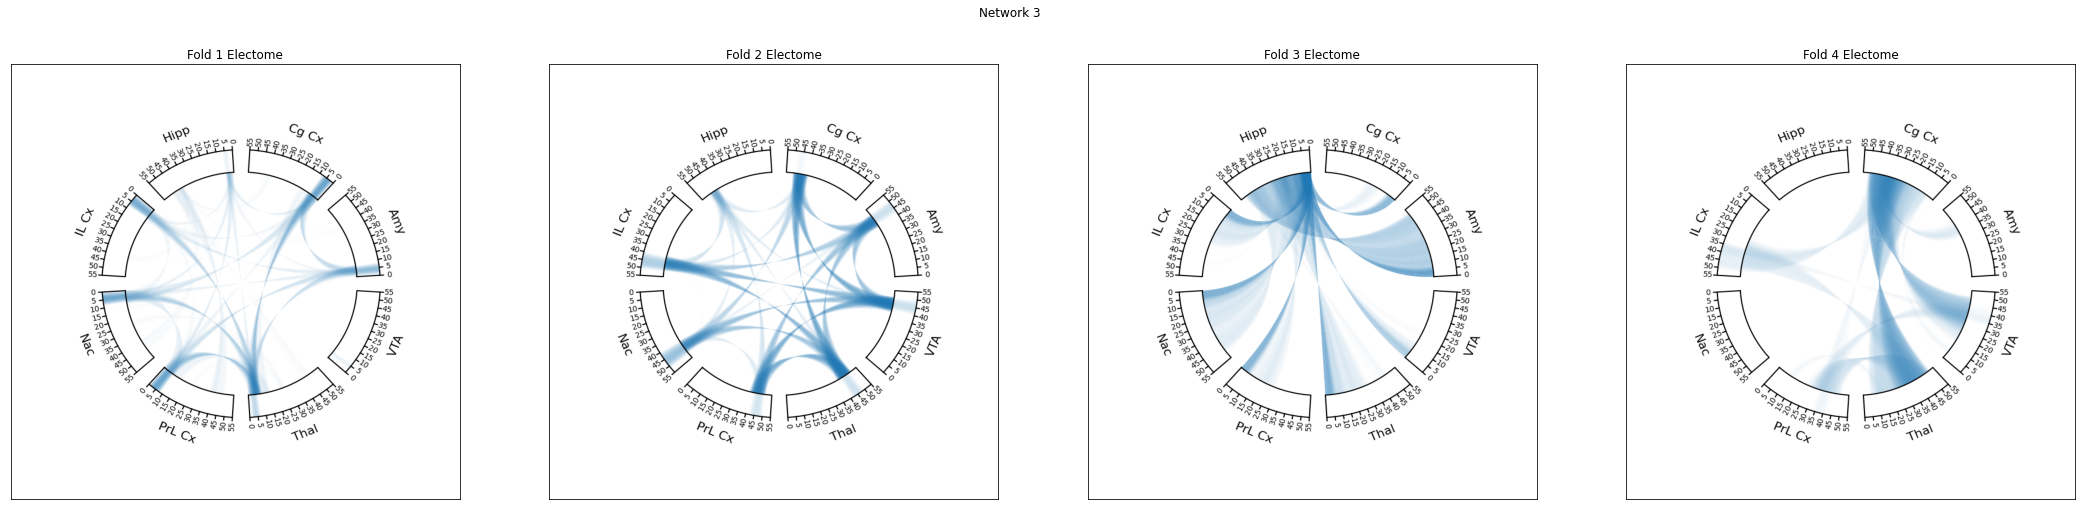

In [20]:
barWidth = 0.05
fig = plt.subplots(figsize=(36,8))

br1 = np.arange(len(flx_auc_list))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]
br7 = [x + barWidth for x in br6]
br8 = [x + barWidth for x in br7]
br9 = [x + barWidth for x in br8]
# Make the plot
plt.bar(br1, flx_auc_list,yerr=flx_sterr_list, width = barWidth,
        color="darkblue",edgecolor ='grey', label ='flx_1',alpha=0.7)
plt.bar(br2, flx_auc_list_2,yerr=flx_sterr_list_2, width = barWidth,
        color="blue",edgecolor ='grey', label ='flx_2',alpha=0.5)
plt.bar(br3, flx_auc_list_3,yerr=flx_sterr_list_3, width = barWidth,
        color="cyan",edgecolor ='grey', label ='flx_3',alpha=0.3)

plt.bar(br4, epm_auc_list,yerr=epm_sterr_list, width = barWidth,
        color ='orange',edgecolor ='grey', label ='epm_1',alpha=0.7)
plt.bar(br5, epm_auc_list_2,yerr=epm_sterr_list_2, width = barWidth,
        color ='moccasin',edgecolor ='grey', label ='epm_2',alpha=0.5)
plt.bar(br6, epm_auc_list_3,yerr=epm_sterr_list_3, width = barWidth,
        color ='oldlace',edgecolor ='grey', label ='epm_3',alpha=0.3)

plt.bar(br7, oft_auc_list,yerr=oft_sterr_list, width = barWidth,
        color ='darkgreen', label ='oft_1',alpha=0.7)
plt.bar(br8, oft_auc_list_2,yerr=oft_sterr_list_2, width = barWidth,
        color ='green',edgecolor ='grey', label ='oft_2',alpha=0.5)
plt.bar(br9, oft_auc_list_3,yerr=oft_sterr_list_3, width = barWidth,
        color ='lightgreen',edgecolor ='grey', label ='oft_3',alpha=0.3)

for fold in range(len(fold_list)):
    plt.scatter(np.ones(len(flx_points_list[fold]))*br1[fold],flx_points_list[fold],color="black")
    plt.scatter(np.ones(len(flx_points_list_2[fold]))*br2[fold],flx_points_list_2[fold],color="black")
    plt.scatter(np.ones(len(flx_points_list_3[fold]))*br3[fold],flx_points_list_3[fold],color="black")

    plt.scatter(np.ones(len(epm_points_list[fold]))*br4[fold],epm_points_list[fold],color="black")
    plt.scatter(np.ones(len(epm_points_list_2[fold]))*br5[fold],epm_points_list_2[fold],color="black")
    plt.scatter(np.ones(len(epm_points_list_3[fold]))*br6[fold],epm_points_list_3[fold],color="black")

    plt.scatter(np.ones(len(oft_points_list[fold]))*br7[fold],oft_points_list[fold],color="black")
    plt.scatter(np.ones(len(oft_points_list_2[fold]))*br8[fold],oft_points_list_2[fold],color="black")
    plt.scatter(np.ones(len(oft_points_list_3[fold]))*br9[fold],oft_points_list_3[fold],color="black")

    
plt.axhline(0.5,-1,6,linestyle="dashed",color="grey")
# Adding Xticks
plt.xlabel('Fold', fontsize = 15)
plt.ylabel('Mean AUC', fontsize = 15)
plt.xticks([r + 4.5*barWidth for r in range(len(flx_auc_list))],
        fold_list)

plt.legend(prop={'size':15})
plt.ylim([0.2,.9])
plt.title("Kfold 3 Network Validation Performance by Task")
plt.show()


for net in [1,2,3]:
    plt.figure(figsize=(37,8))
    
    for i,fold in enumerate(fold_list):
        plt.subplot(1,4,i+1)
        im = image.imread(plots_file.format(net,fold))
        plt.imshow(im,aspect="auto")
        plt.title("Fold {} Electome".format(fold))
        plt.xticks([])
        plt.yticks([])
    plt.suptitle("Network {}".format(net))
    plt.show()

## 3 to 1 Network

Here we train the model to learn 3 networks to predict a single behavioral label in a multivariate logistic regression. We do the same network matching analysis as above.

In [26]:
results_file = results_path + "unbal_321_net_{}_results.pkl"
plots_file = plots_path + "unbal_321_network_net_{}_30_component_kf_fold_{}_electome.png"

fold_list = [1,2,3,4]

flx_auc_list = []
epm_auc_list = []
oft_auc_list = []

flx_sterr_list = []
epm_sterr_list = []
oft_sterr_list = []

flx_points_list = []
epm_points_list = []
oft_points_list = []

net_1_list = []
net_2_list = []
net_3_list = []
    
for fold in fold_list:
    
    resultsDict = pickle.load(open(results_file.format(fold),"rb"))
    print(fold)
    
    flx_mean, flx_sterr, flx_n = mean_sterr_auc(resultsDict['flx_val_auc'])
    print("FLX",flx_mean, flx_sterr, flx_n)
    flx_auc_list.append(flx_mean)
    flx_sterr_list.append(flx_sterr)
    flx_points_list.append([resultsDict['flx_val_auc'][key] for key in resultsDict['flx_val_auc'].keys()])

    epm_mean, epm_sterr, epm_n = mean_sterr_auc(resultsDict['epm_val_auc'])
    print("EPM",epm_mean, epm_sterr, epm_n)
    epm_auc_list.append(epm_mean)
    epm_sterr_list.append(epm_sterr)
    epm_points_list.append([resultsDict['epm_val_auc'][key] for key in resultsDict['epm_val_auc'].keys()])
  
    oft_mean, oft_sterr, oft_n = mean_sterr_auc(resultsDict['oft_val_auc'])
    print("OFT",oft_mean, oft_sterr, oft_n)
    oft_auc_list.append(oft_mean)
    oft_sterr_list.append(oft_sterr)
    oft_points_list.append([resultsDict['oft_val_auc'][key] for key in resultsDict['oft_val_auc'].keys()])

    net_1_list.append(resultsDict['recon_cont_net_1'])
    net_2_list.append(resultsDict['recon_cont_net_2'])
    net_3_list.append(resultsDict['recon_cont_net_3'])
    print(resultsDict["best_epoch"])

1
FLX 0.6842449646278198 0.07717238965416945 3
EPM 0.5569913113213901 0.027250543151789673 7
OFT 0.6668519180776045 0.07280437125075279 3
680
2
FLX 0.6680211906668758 0.0538963393579726 2
EPM 0.53508701286354 0.0314966560891078 7
OFT 0.7064020255615812 0.055923994053701354 2
3538
3
FLX 0.6355180403034133 0.005514182049082854 2
EPM 0.5542830625176418 0.020294846348335508 6
OFT 0.6697863802731827 0.02562876884009479 4
3952
4
FLX 0.6018013265630422 0.012664903291555034 2
EPM 0.6087986201035465 0.032512299910303785 6
OFT 0.5893415588250581 0.03184981574860911 3
279


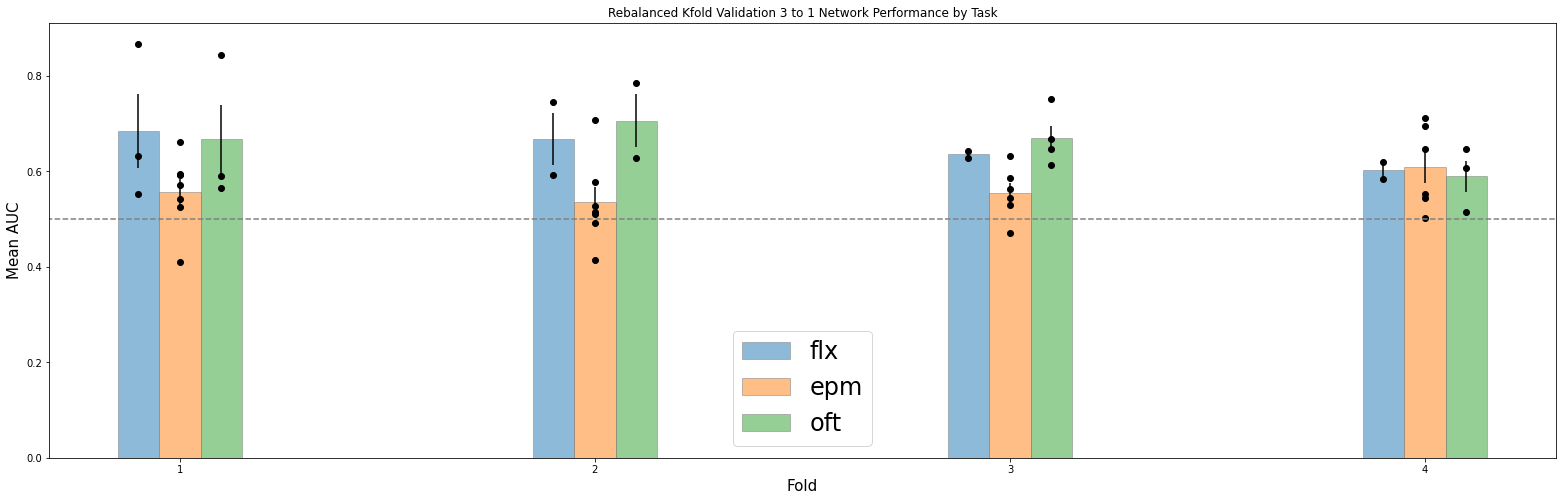

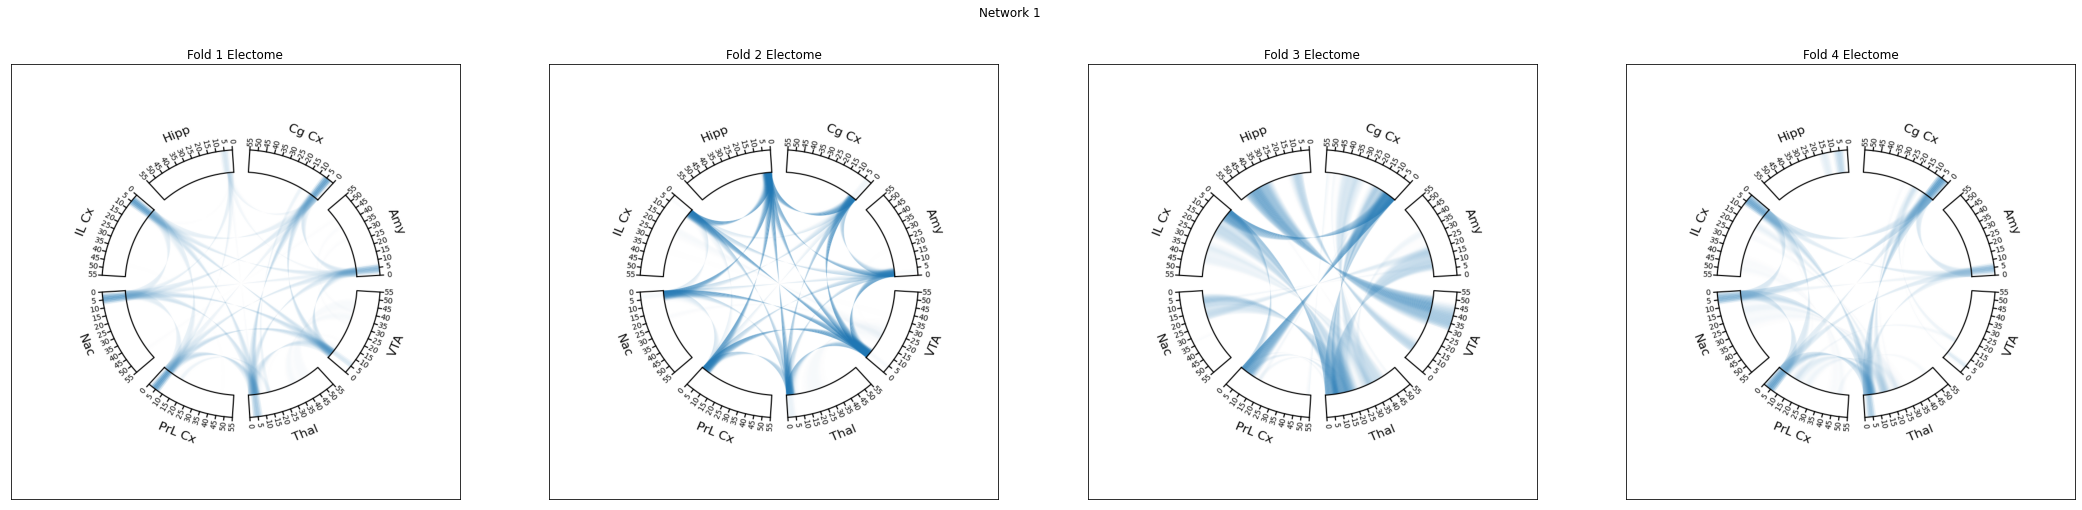

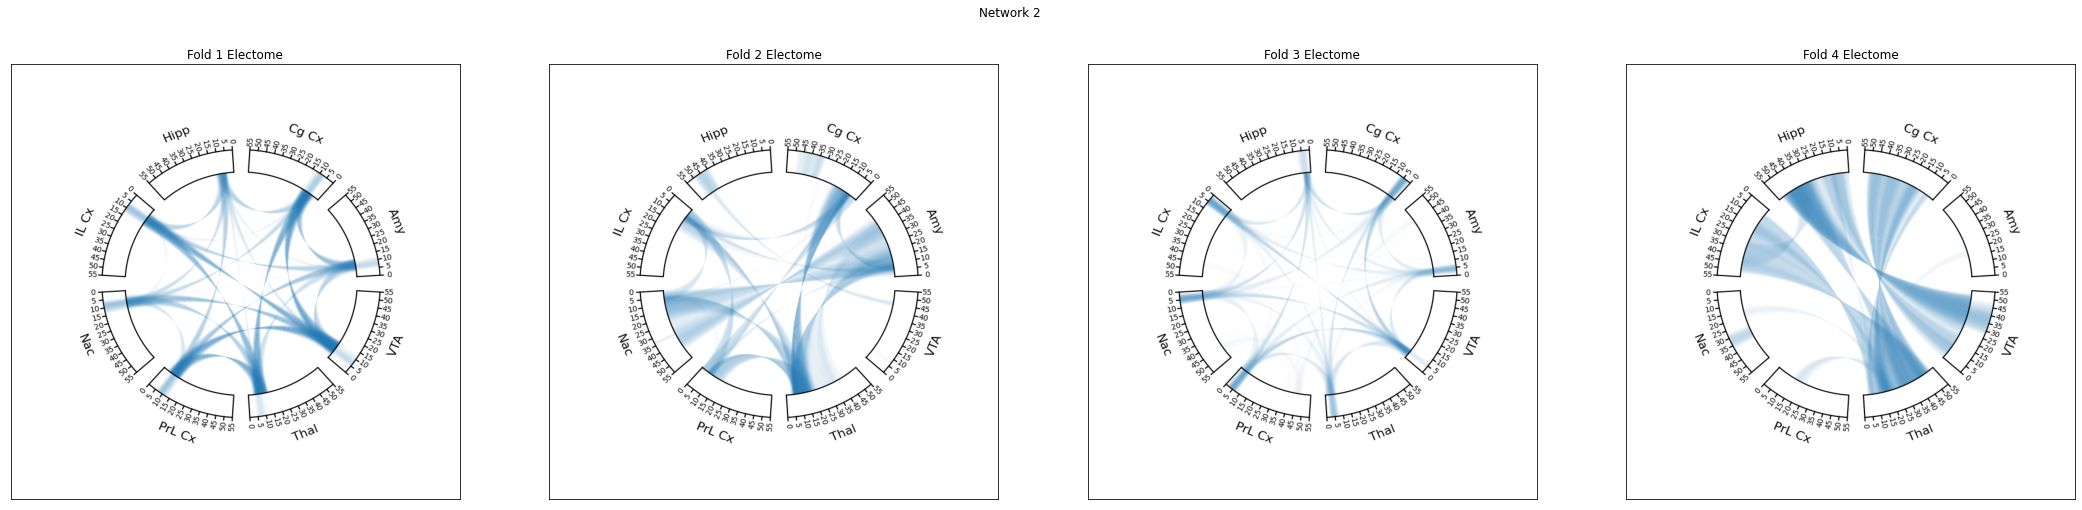

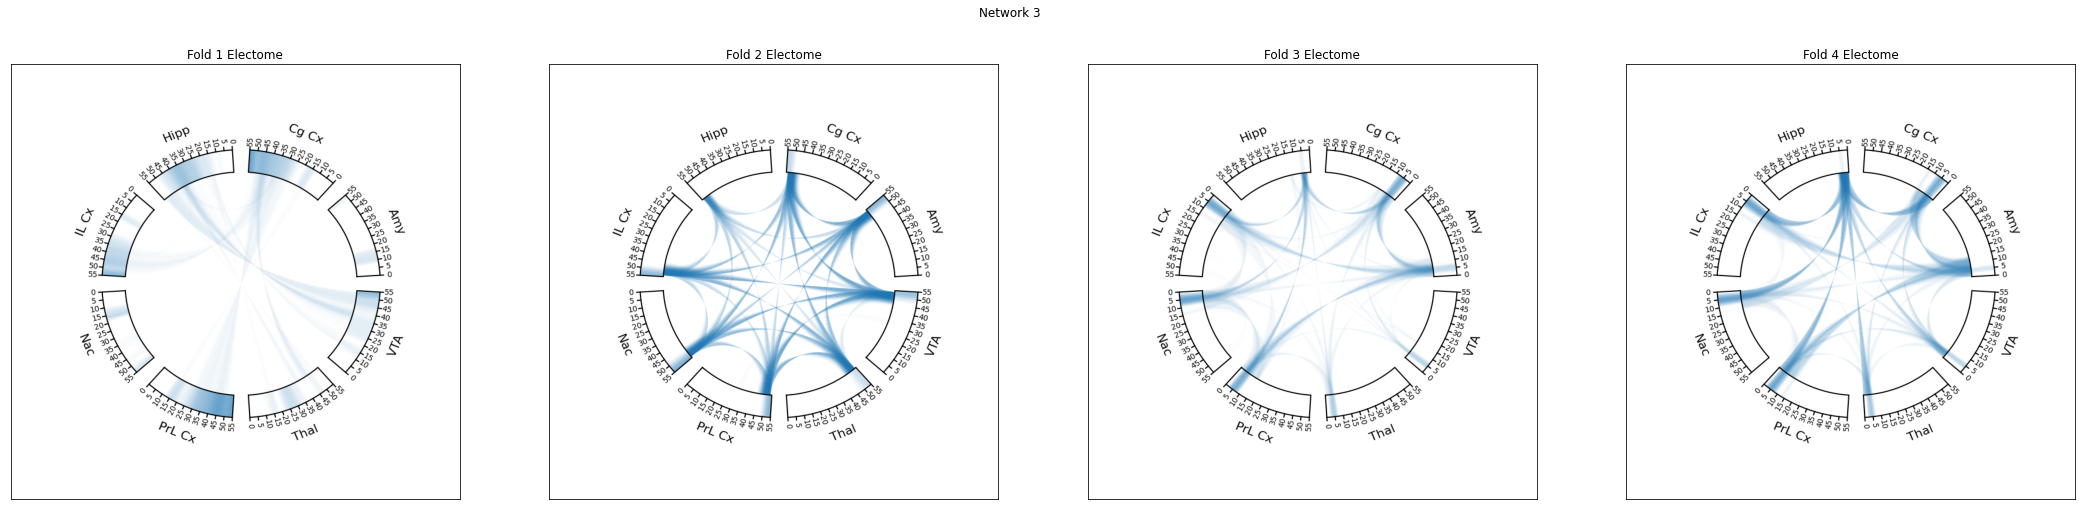

In [27]:
barWidth = 0.1
fig = plt.subplots(figsize=(27,8))

br1 = np.arange(len(flx_auc_list))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, flx_auc_list,yerr=flx_sterr_list, width = barWidth,
        edgecolor ='grey', label ='flx',alpha=0.5)
plt.bar(br2, epm_auc_list,yerr=epm_sterr_list, width = barWidth,
        edgecolor ='grey', label ='epm',alpha=0.5)
plt.bar(br3, oft_auc_list,yerr=oft_sterr_list, width = barWidth,
        edgecolor ='grey', label ='oft',alpha=0.5)

for fold in range(len(fold_list)):
    plt.scatter(np.ones(len(flx_points_list[fold]))*br1[fold],flx_points_list[fold],color="black")
    plt.scatter(np.ones(len(epm_points_list[fold]))*br2[fold],epm_points_list[fold],color="black")
    plt.scatter(np.ones(len(oft_points_list[fold]))*br3[fold],oft_points_list[fold],color="black")

# Adding Xticks
plt.axhline(0.5,-1,6,linestyle="dashed",color="grey")
plt.xlabel('Fold', fontsize = 15)
plt.ylabel('Mean AUC', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(flx_auc_list))],
        fold_list)
#plt.ylim([,1])
plt.legend(prop={'size':24})
plt.title("Rebalanced Kfold Validation 3 to 1 Network Performance by Task")
plt.show()

for net in [1,2,3]:
    plt.figure(figsize=(37,8))
    
    for i,fold in enumerate(fold_list):
        plt.subplot(1,4,i+1)
        im = image.imread(plots_file.format(net,fold))
        plt.imshow(im,aspect="auto")
        plt.title("Fold {} Electome".format(fold))
        plt.xticks([])
        plt.yticks([])
    plt.suptitle("Network {}".format(net))
    plt.show()